In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns
from datetime import datetime

In [5]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [6]:
df = pd.read_csv("C:\\Users\\Anand Kumar\\Downloads\\Vehicle_Registration_Summary.csv")

In [7]:
print("Dataset Info:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())
print("\nDescriptive Statistics:")
print(df.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111647 entries, 0 to 111646
Data columns (total 11 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Transaction Count                           111647 non-null  int64  
 1   Calendar Year                               111647 non-null  int64  
 2   Fiscal Year                                 111647 non-null  int64  
 3   Transaction Type                            111647 non-null  object 
 4   Primary Use                                 111647 non-null  object 
 5   Vehicle Type                                111647 non-null  object 
 6   Gross Vehicle Weight Rating Class           96692 non-null   float64
 7   Gross Vehicle Weight Rating Range (Pounds)  96692 non-null   object 
 8   Electrification Level                       111647 non-null  object 
 9   County                                      111647 non-n

In [8]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Transaction Count                                 0
Calendar Year                                     0
Fiscal Year                                       0
Transaction Type                                  0
Primary Use                                       0
Vehicle Type                                      0
Gross Vehicle Weight Rating Class             14955
Gross Vehicle Weight Rating Range (Pounds)    14955
Electrification Level                             0
County                                            0
State                                           130
dtype: int64


In [9]:
numeric_cols = ['Transaction Count', 'Calendar Year', 'Fiscal Year']
df[numeric_cols] = df[numeric_cols].fillna(0)

In [10]:
categorical_cols = ['Transaction Type', 'Primary Use', 'Vehicle Type', 
                   'Gross Vehicle Weight Rating Class', 'Electrification Level', 
                   'County', 'State']

In [11]:
df[categorical_cols] = df[categorical_cols].fillna('Unknown')

In [12]:
df['Calendar Year'] = df['Calendar Year'].astype(int)
df['Fiscal Year'] = df['Fiscal Year'].astype(int)

In [13]:
df['Decade'] = (df['Calendar Year'] // 10) * 10

In [18]:
df['Electrification Level'] = df['Electrification Level'].str.replace(
    'HEV (Hybrid Electric Vehicle) - Level Unknown', 'HEV', regex=False
)


In [19]:
df['Electrification Level'] = df['Electrification Level'].str.replace('Mild HEV (Hybrid Electric Vehicle0)', 'Mild HEV')

In [20]:
df['Electrification Level'] = df['Electrification Level'].str.replace('Strong HEV (Hybrid Electric Vehicle)', 'Strong HEV')

In [21]:
df['Electrification Level'] = df['Electrification Level'].str.replace('ICE (Internal Combustion Engine)', 'ICE')

In [22]:
df['Electrification Level'] = df['Electrification Level'].str.replace('BEV (Battery Electric Vehicle)', 'BEV')

In [23]:
df['Electrification Level'] = df['Electrification Level'].str.replace('PHEV (Plug-in Hybrid Electric Vehicle)', 'PHEV')

In [24]:
def simplify_vehicle_type(vehicle_type):
    if 'PASSENGER' in vehicle_type:
        return 'Passenger'
    elif 'TRUCK' in vehicle_type:
        return 'Truck'
    elif 'MOTORCYCLE' in vehicle_type:
        return 'Motorcycle'
    elif 'BUS' in vehicle_type:
        return 'Bus'
    elif 'INCOMPLETE' in vehicle_type:
        return 'Incomplete Vehicle'
    else:
        return 'Other'

In [25]:
df['Vehicle Category'] = df['Vehicle Type'].apply(simplify_vehicle_type)

<Axes: xlabel='Calendar Year'>

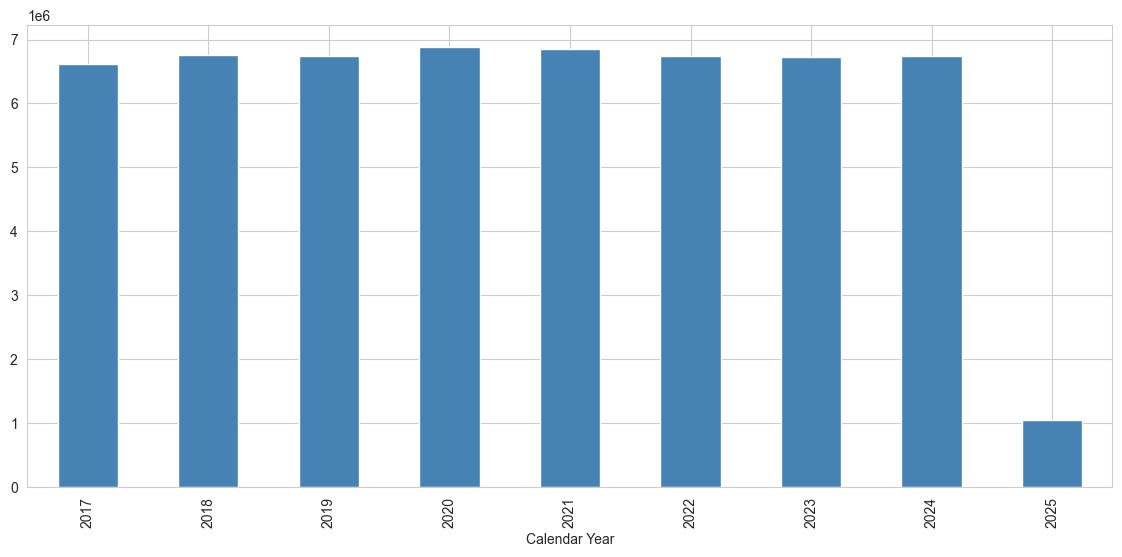

In [26]:
plt.figure(figsize=(14, 6))
yearly_totals = df.groupby('Calendar Year')['Transaction Count'].sum()
yearly_totals.plot(kind='bar', color='steelblue')

<Axes: ylabel='count'>

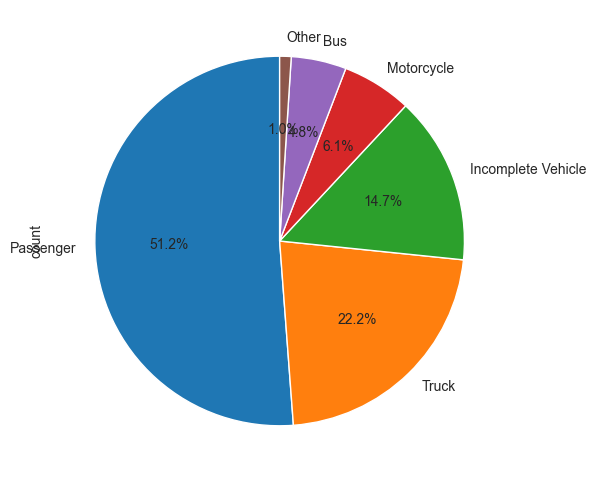

In [28]:
plt.figure(figsize=(12, 6))
vehicle_counts = df['Vehicle Category'].value_counts()
vehicle_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)

Text(0.5, 1.0, 'Vehicle Electrification Trends Over Time')

<Figure size 1400x700 with 0 Axes>

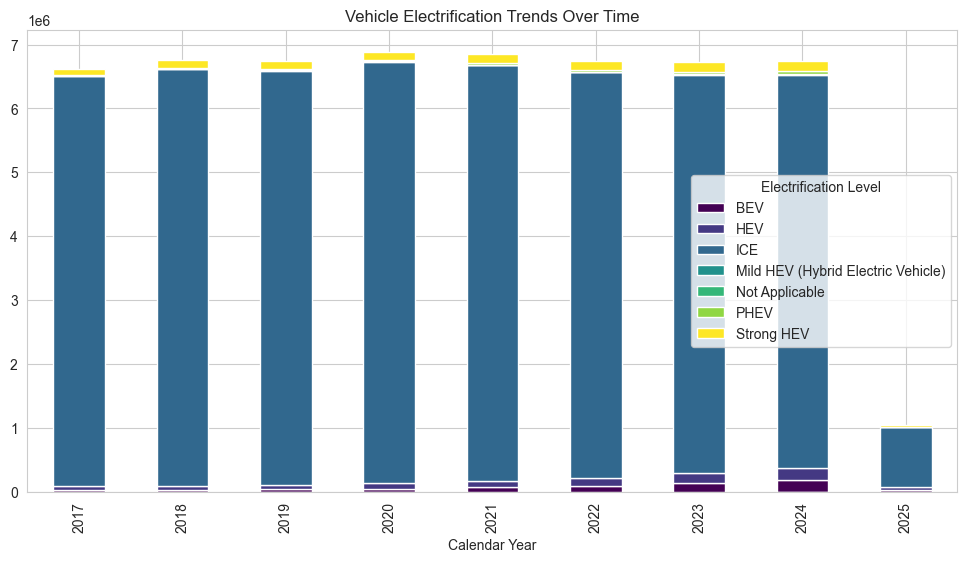

In [29]:
plt.figure(figsize=(14, 7))
electrification_trends = df.groupby(['Calendar Year', 'Electrification Level'])['Transaction Count'].sum().unstack()
electrification_trends.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Vehicle Electrification Trends Over Time')

In [31]:
electric_vehicles = ['BEV', 'PHEV', 'HEV', 'Mild HEV', 'Strong HEV']
ev_df = df[df['Electrification Level'].isin(electric_vehicles)]


<Axes: xlabel='Calendar Year'>

<Figure size 1400x600 with 0 Axes>

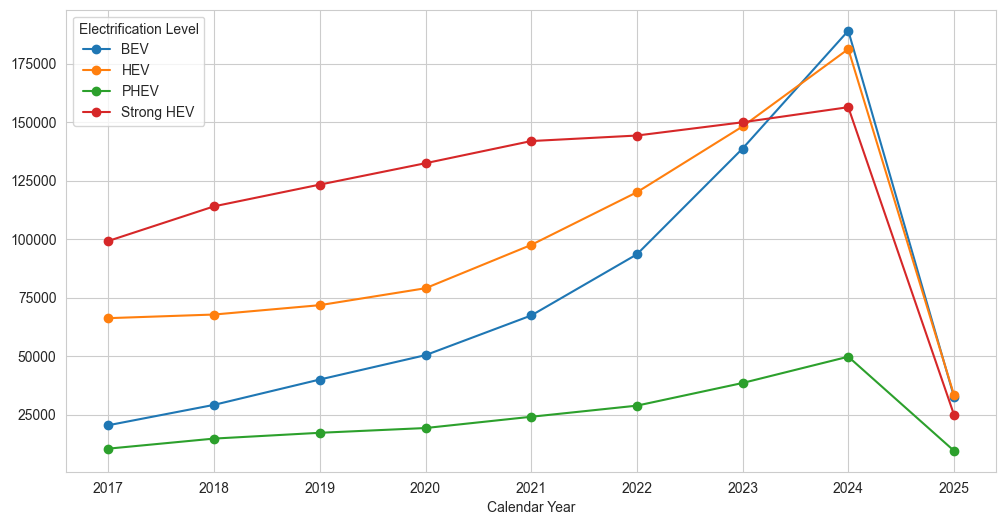

In [32]:
plt.figure(figsize=(14, 6))
ev_trends = ev_df.groupby(['Calendar Year', 'Electrification Level'])['Transaction Count'].sum().unstack()
ev_trends.plot(kind='line', marker='o')

Text(0.5, 1.0, 'Top 10 Counties by Vehicle Registrations')

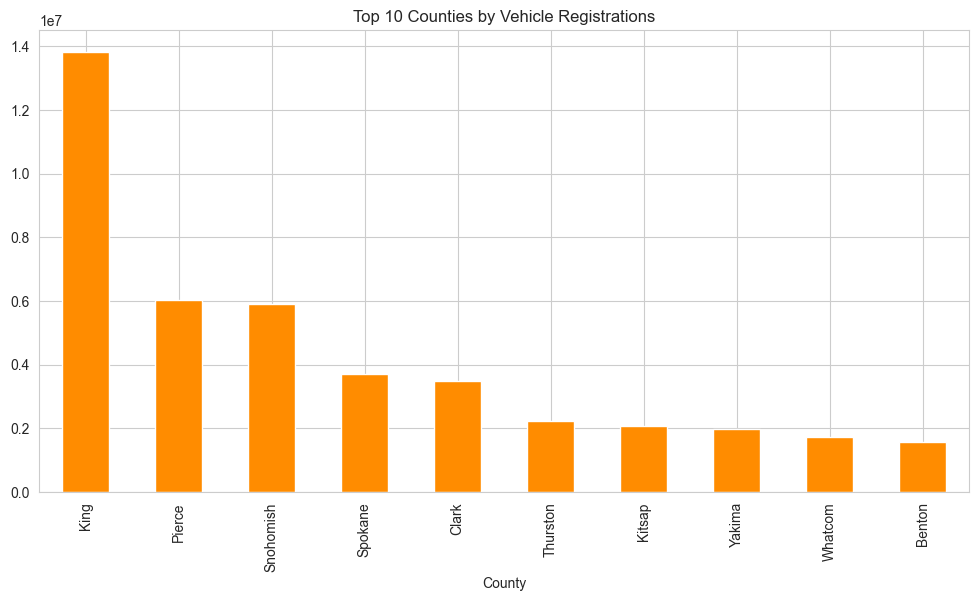

In [34]:
plt.figure(figsize=(12, 6))
county_totals = df.groupby('County')['Transaction Count'].sum().sort_values(ascending=False).head(10)
county_totals.plot(kind='bar', color='darkorange')
plt.title('Top 10 Counties by Vehicle Registrations')

Text(0, 0.5, 'Number of EV Registrations')

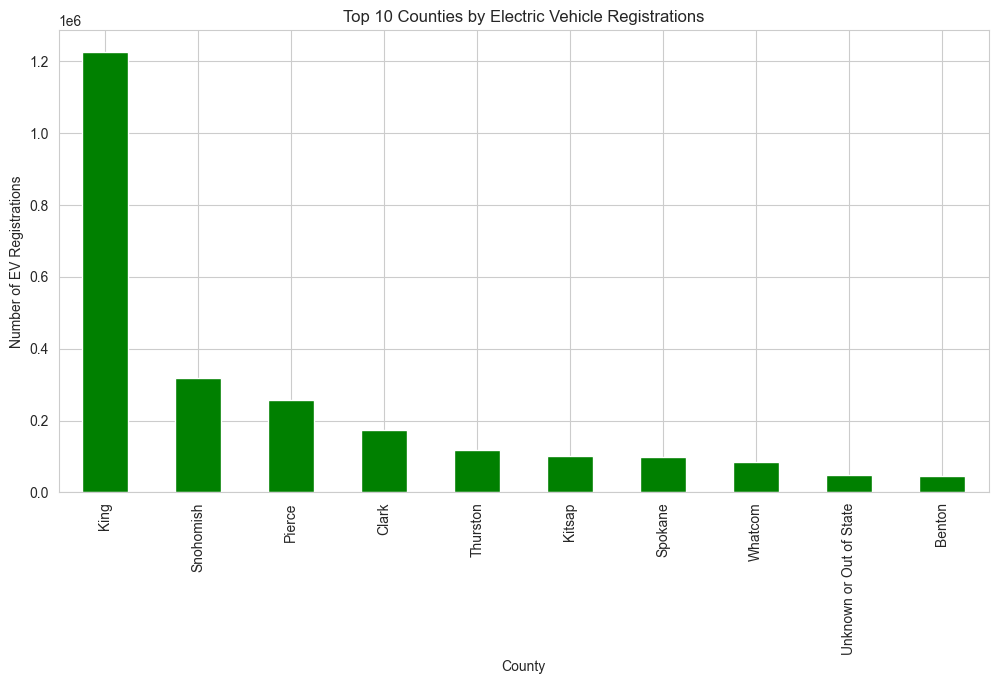

In [35]:
plt.figure(figsize=(12, 6))
ev_by_county = ev_df.groupby('County')['Transaction Count'].sum().sort_values(ascending=False).head(10)
ev_by_county.plot(kind='bar', color='green')
plt.title('Top 10 Counties by Electric Vehicle Registrations')
plt.xlabel('County')
plt.ylabel('Number of EV Registrations')

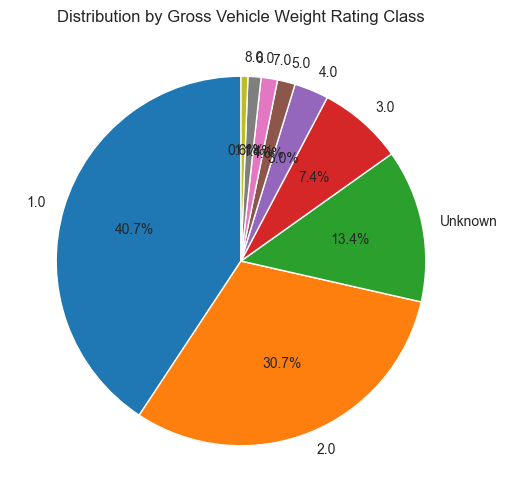

In [36]:
plt.figure(figsize=(12, 6))
weight_class_counts = df['Gross Vehicle Weight Rating Class'].value_counts()
weight_class_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribution by Gross Vehicle Weight Rating Class')
plt.ylabel('')
plt.show()

<Figure size 1400x700 with 0 Axes>

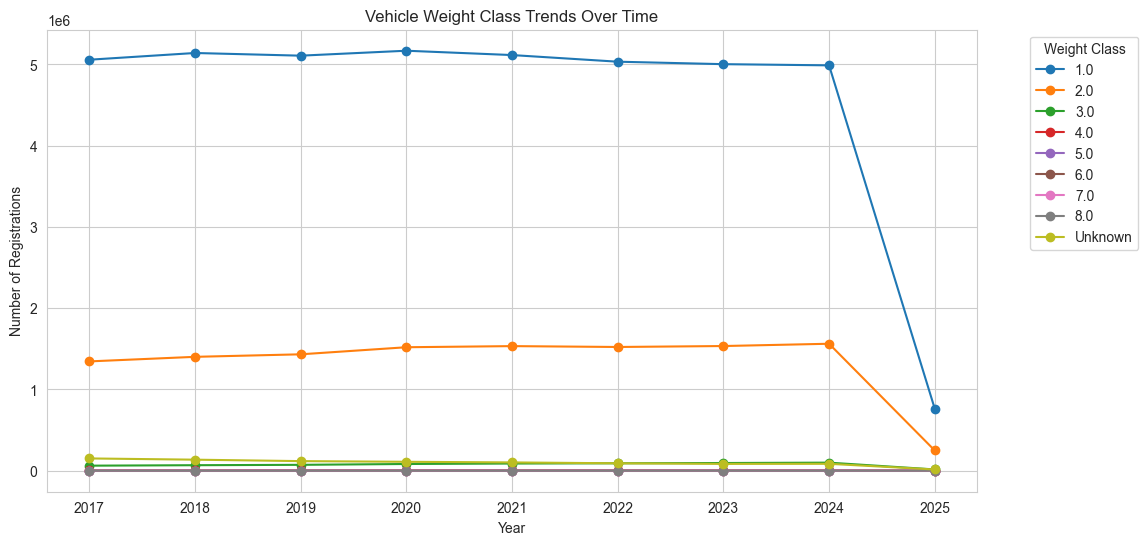

In [37]:
plt.figure(figsize=(14, 7))
weight_trends = df.groupby(['Calendar Year', 'Gross Vehicle Weight Rating Class'])['Transaction Count'].sum().unstack()
weight_trends.plot(kind='line', marker='o')
plt.title('Vehicle Weight Class Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Registrations')
plt.grid(True)
plt.legend(title='Weight Class', bbox_to_anchor=(1.05, 1), loc='upper left')

Text(0.5, 1.0, 'Distribution of Transaction Types')

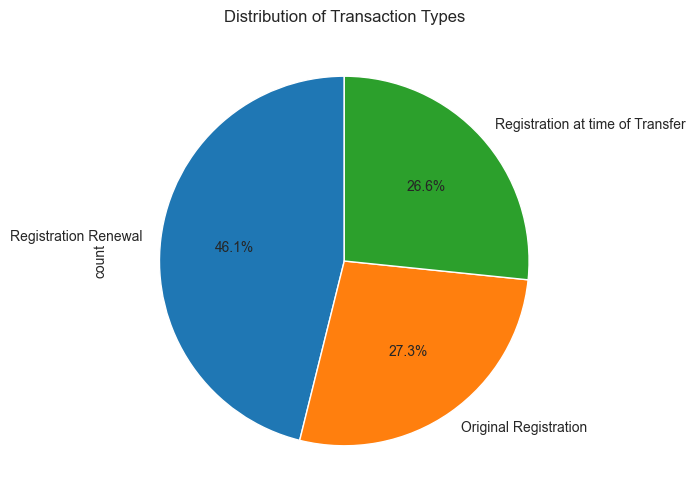

In [38]:
plt.figure(figsize=(12, 6))
transaction_counts = df['Transaction Type'].value_counts()
transaction_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Transaction Types')

<Figure size 1400x700 with 0 Axes>

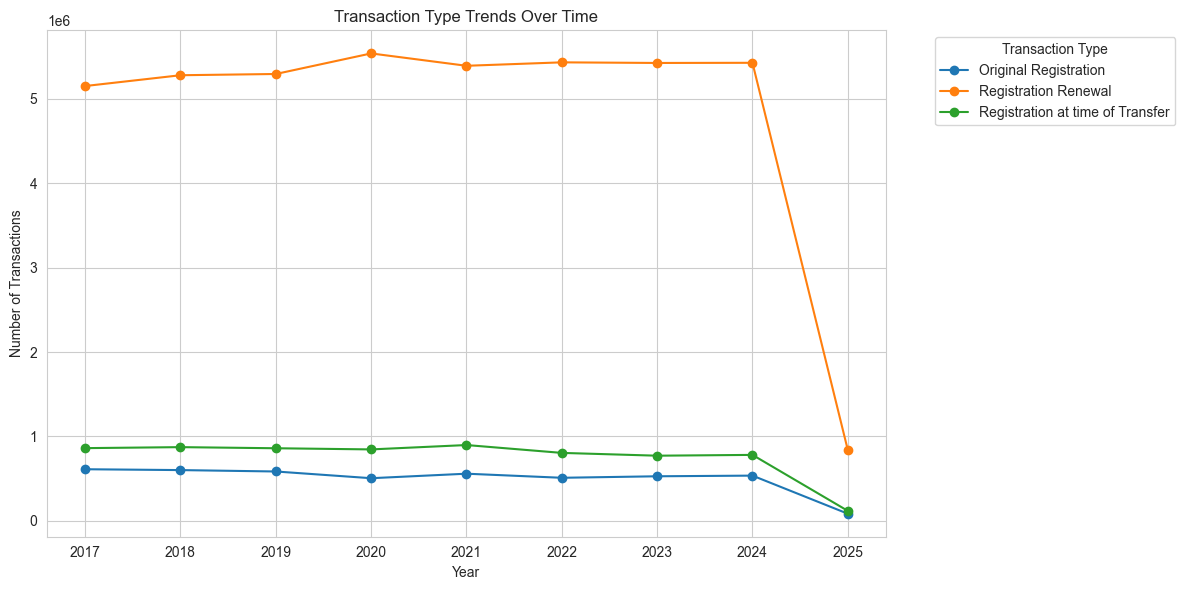

In [39]:
plt.figure(figsize=(14, 7))
transaction_trends = df.groupby(['Calendar Year', 'Transaction Type'])['Transaction Count'].sum().unstack()
transaction_trends.plot(kind='line', marker='o')
plt.title('Transaction Type Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.legend(title='Transaction Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

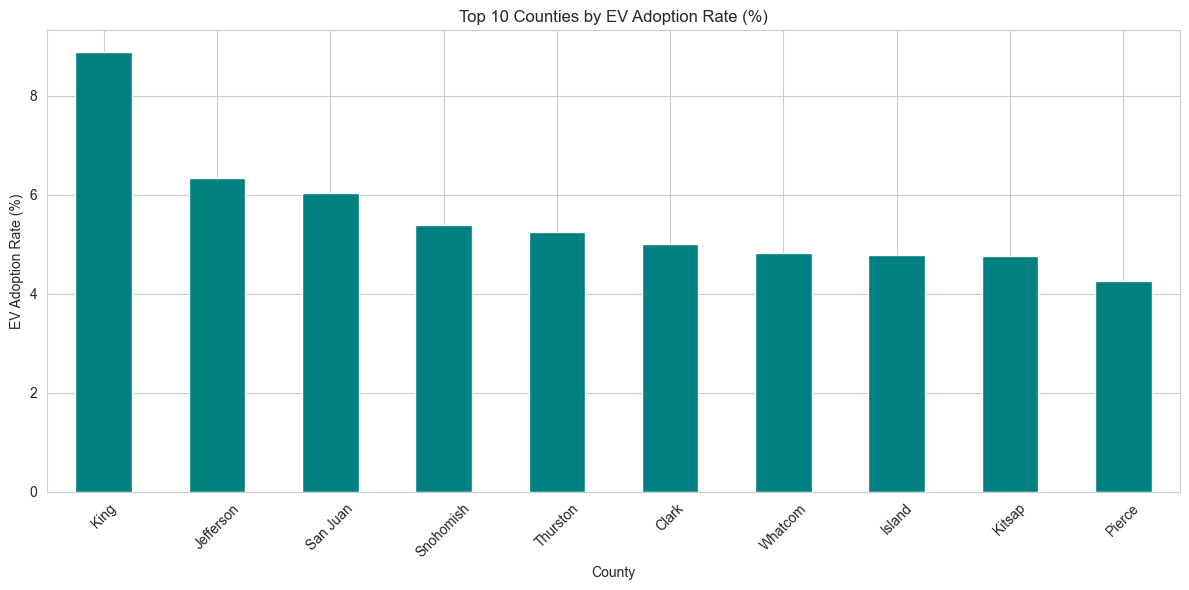

In [40]:
county_totals = df.groupby('County')['Transaction Count'].sum()
ev_county_totals = ev_df.groupby('County')['Transaction Count'].sum()
ev_adoption = (ev_county_totals / county_totals * 100).sort_values(ascending=False).dropna().head(10)

plt.figure(figsize=(12, 6))
ev_adoption.plot(kind='bar', color='teal')
plt.title('Top 10 Counties by EV Adoption Rate (%)')
plt.xlabel('County')
plt.ylabel('EV Adoption Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

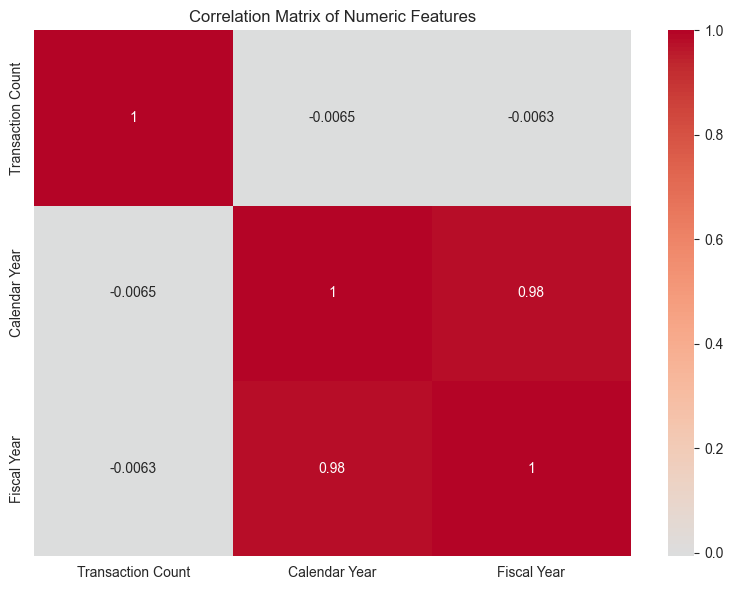

In [41]:
# Create a correlation matrix for numeric features
numeric_df = df[['Transaction Count', 'Calendar Year', 'Fiscal Year']]
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numeric Features')
plt.tight_layout()
plt.show()

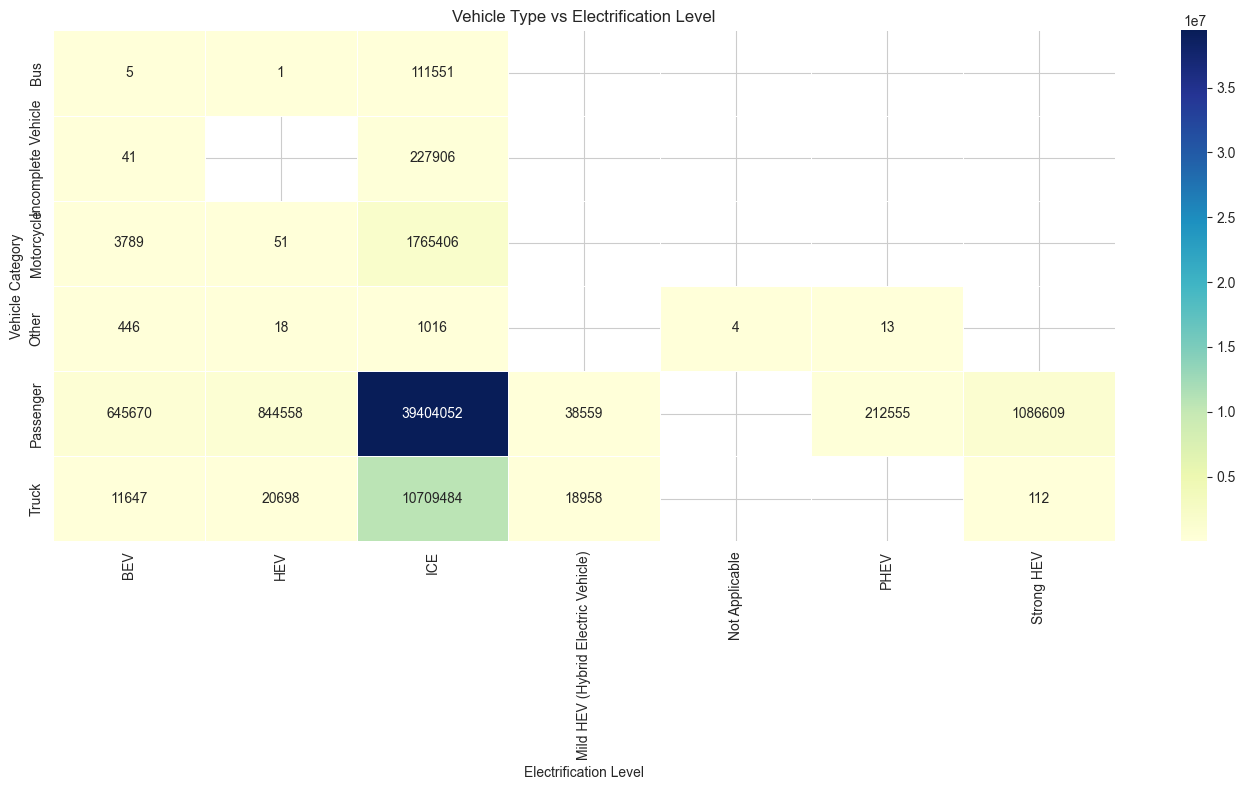

In [42]:
# Cross-tabulation of vehicle type and electrification
cross_tab = pd.crosstab(df['Vehicle Category'], df['Electrification Level'], 
                        values=df['Transaction Count'], aggfunc='sum')

plt.figure(figsize=(14, 8))
sns.heatmap(cross_tab, annot=True, fmt='.0f', cmap='YlGnBu', linewidths=.5)
plt.title('Vehicle Type vs Electrification Level')
plt.xlabel('Electrification Level')
plt.ylabel('Vehicle Category')
plt.tight_layout()
plt.show()

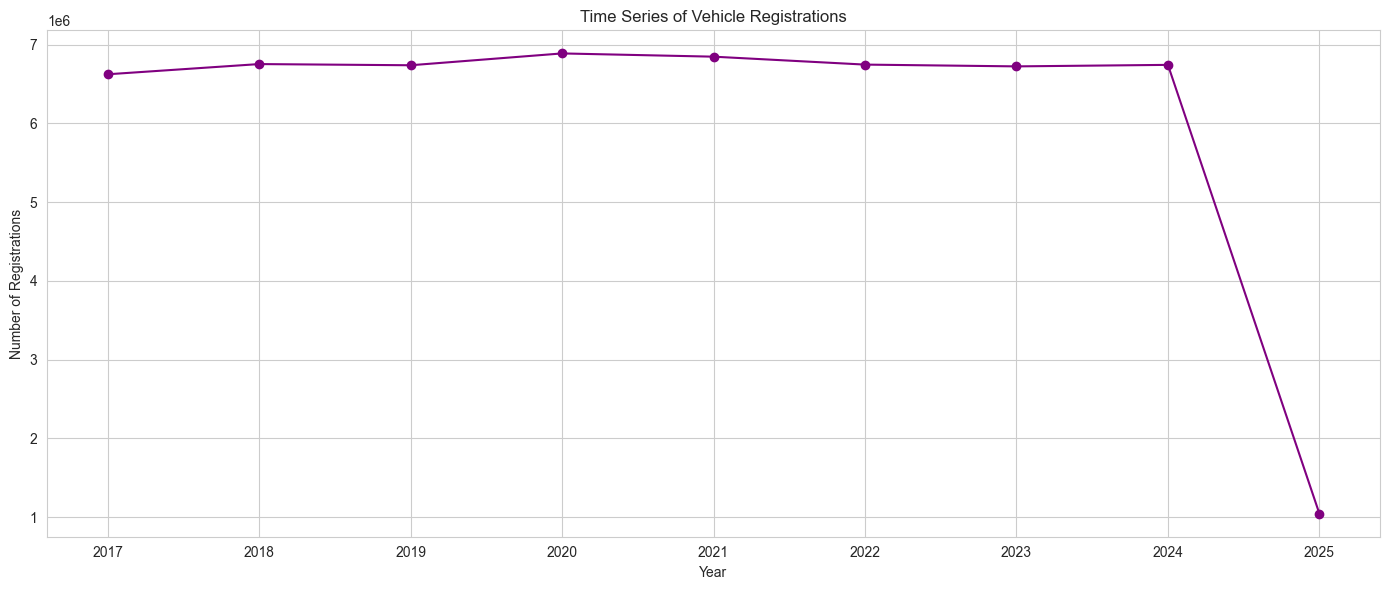

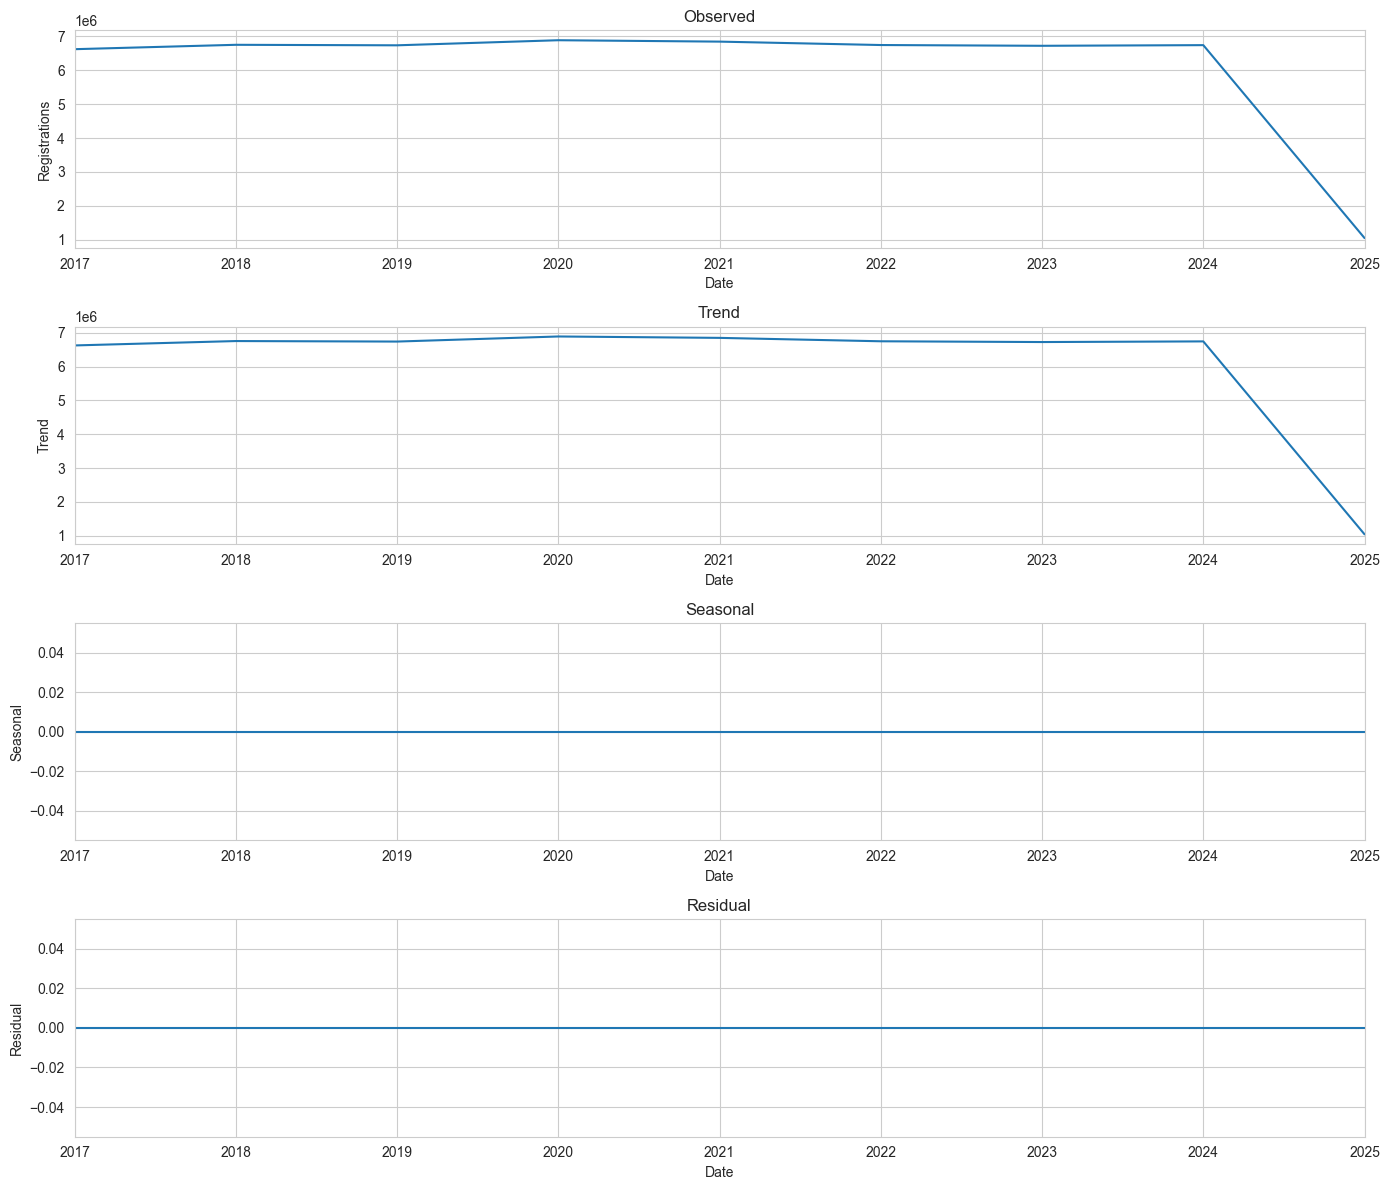

In [43]:
# Time series of vehicle registrations
plt.figure(figsize=(14, 6))
df.groupby('Calendar Year')['Transaction Count'].sum().plot(kind='line', marker='o', color='purple')
plt.title('Time Series of Vehicle Registrations')
plt.xlabel('Year')
plt.ylabel('Number of Registrations')
plt.grid(True)
plt.tight_layout()
plt.show()

# Seasonal decomposition (requires statsmodels)
try:
    from statsmodels.tsa.seasonal import seasonal_decompose
    
    # Create a time series dataframe
    ts_df = df.groupby('Calendar Year')['Transaction Count'].sum().reset_index()
    ts_df['Date'] = pd.to_datetime(ts_df['Calendar Year'], format='%Y')
    ts_df.set_index('Date', inplace=True)
    
    # Decompose the time series
    decomposition = seasonal_decompose(ts_df['Transaction Count'], model='additive', period=1)
    
    # Plot decomposition
    plt.figure(figsize=(14, 12))
    
    plt.subplot(411)
    decomposition.observed.plot(ax=plt.gca(), title='Observed')
    plt.ylabel('Registrations')
    
    plt.subplot(412)
    decomposition.trend.plot(ax=plt.gca(), title='Trend')
    plt.ylabel('Trend')
    
    plt.subplot(413)
    decomposition.seasonal.plot(ax=plt.gca(), title='Seasonal')
    plt.ylabel('Seasonal')
    
    plt.subplot(414)
    decomposition.resid.plot(ax=plt.gca(), title='Residual')
    plt.ylabel('Residual')
    
    plt.tight_layout()
    plt.show()
    
except ImportError:
    print("Statsmodels not installed. Skipping seasonal decomposition.")